<a href="https://colab.research.google.com/github/himsingh24/STARTUP-PROFIT-PREDICTION/blob/main/Startup_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt  # for visualization
import pandas as pd  # for handling and cleaning the dataset
import seaborn as sns  # for visualization
import sklearn  # for model evaluation and development

In [ ]:
dataset = pd.read_csv(r'/content/50_Startups.csv')
dataset.head()  # displays first 5 rows of dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


###EDA - (Exploratory Data Analysis)

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.duplicated().sum()  #using duplicated() pre-defined function

0

In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


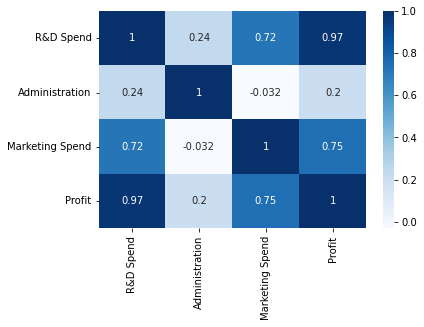

In [ ]:
c = dataset.corr()  # corr inbuilt fn
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

## Outlier Detection

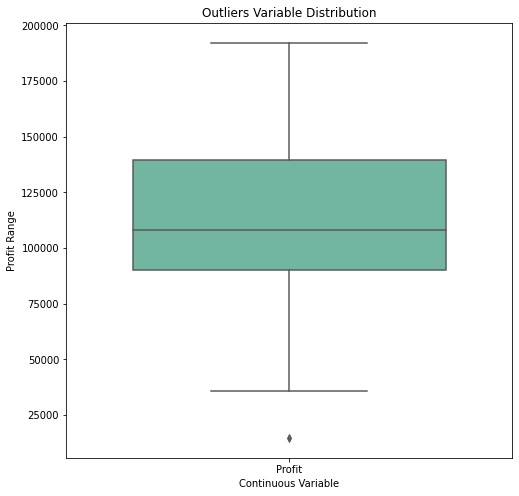

In [ ]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
 
plt.show()

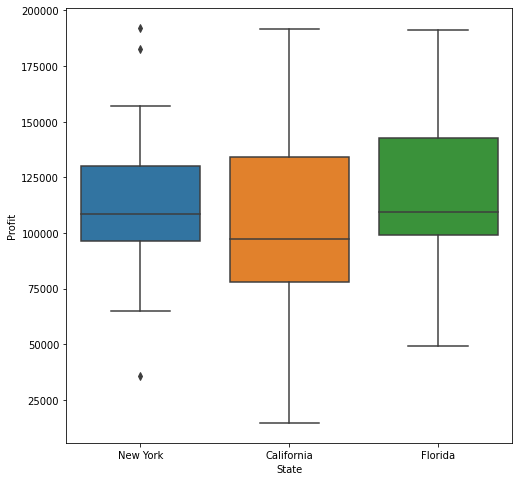

In [ ]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


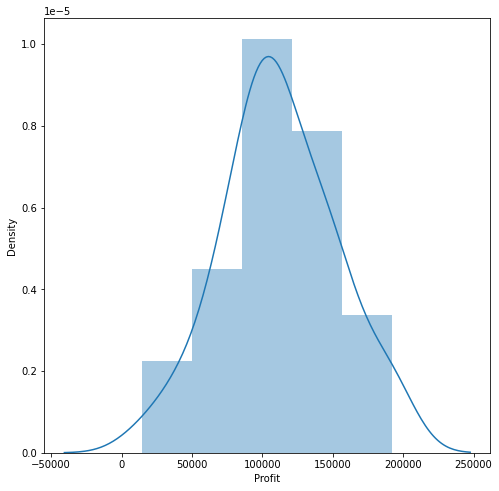

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

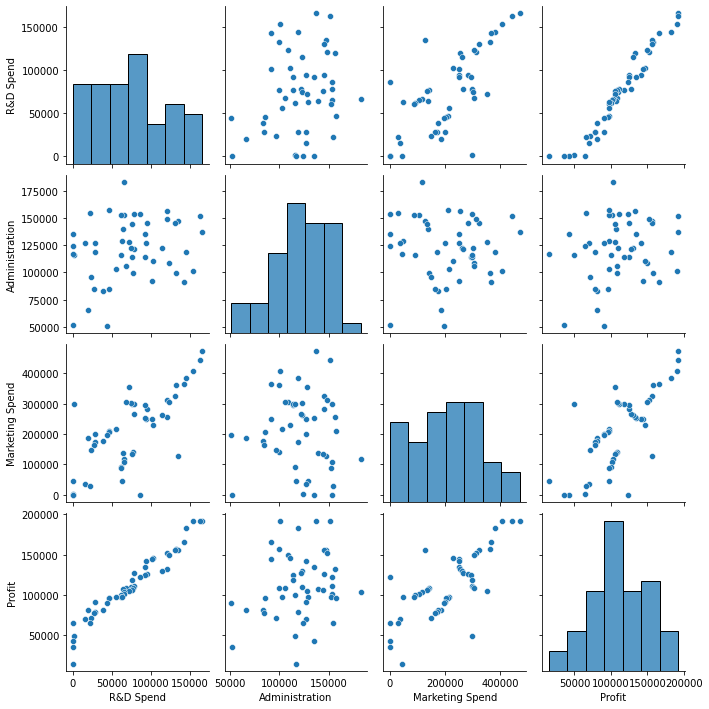

In [ ]:
sns.pairplot(dataset)
plt.show()

## Creating Features and Labels

In [ ]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, 4].values
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0



 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0) # performs the split
print(x_train)

[[1.3029813e+05 1.4553006e+05 4.0000000e+01]
 [1.1994324e+05 1.5654742e+05 2.8000000e+01]
 [1.0002300e+03 1.2415304e+05 1.0000000e+00]
 [5.4205000e+02 5.1743150e+04 0.0000000e+00]
 [6.5605480e+04 1.5303206e+05 8.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.9000000e+01]
 [6.1994480e+04 1.1564128e+05 7.0000000e+00]
 [6.3408860e+04 1.2921961e+05 5.0000000e+00]
 [7.8013110e+04 1.2159755e+05 3.0000000e+01]
 [2.3640930e+04 9.6189630e+04 1.4000000e+01]
 [7.6253860e+04 1.1386730e+05 3.4000000e+01]
 [1.5505730e+04 1.2738230e+05 3.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.9000000e+01]
 [9.1992390e+04 1.3549507e+05 2.7000000e+01]
 [6.4664710e+04 1.3955316e+05 1.2000000e+01]
 [1.3187690e+05 9.9814710e+04 4.2000000e+01]
 [9.4657160e+04 1.4507758e+05 3.1000000e+01]
 [2.8754330e+04 1.1854605e+05 1.6000000e+01]
 [0.0000000e+00 1.1698380e+05 4.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.6000000e+01]
 [9.3863750e+04 1.2732038e+05 2.6000000e+01]
 [4.4069950e+04 5.1283140e+04 1.9000000e+01]
 [7.704401

Model Development

In [ ]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


 Predicting Results

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[103365.65430448 132409.63159464 133669.58924177  71596.33493623
 179574.8809234  114195.96899299  65656.85292429  97938.81018901
 114412.29898539 169772.36831918  96050.9051499   87515.25731045
 110242.6075272   90000.89195708 127479.23515393]


Model Score

In [ ]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
 
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848


In [ ]:
df = pd.DataFrame(data={"Predicted value":y_pred.flatten(),"Actual Value":y_test.flatten()})
print(df.head())

   Predicted value  Actual Value
0    103365.654304     103282.38
1    132409.631595     144259.40
2    133669.589242     146121.95
3     71596.334936      77798.83
4    179574.880923     191050.39


Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
 
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6603.2386289610795


In [ ]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6524519362.31741


In [ ]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  807744.969796619


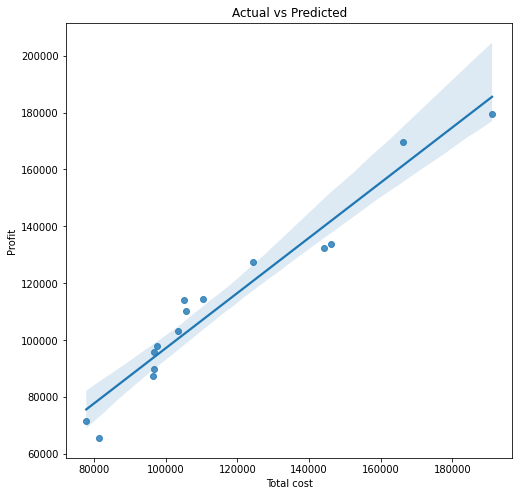

In [ ]:
plt.title("Actual vs Predicted")
plt.xlabel("Total cost")
plt.ylabel("Profit")
sns.regplot(x=y_test, y=y_pred, data=df)